# Spam Detection

Spam emails also referred to as spam are junk emails. They are sent in bulk for commercial purposes. Spam emails can also be dangerous. It can include malicious links that can infect your computer with malware or phishing attacks.

DATASET DESCRIPTION:

email - Email message.
label - 1: Email is Spam/ 0: Email is not Spam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('spam_or_not_spam - Copy.csv')
df.head(5)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
df.shape

(3000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [6]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
df['email'].isnull().sum()

1

In [8]:
# filling the null value using fillna() method
df['email'].fillna(method = 'ffill', inplace = True)
df['email'].isnull().sum()

C:\Users\meetu\AppData\Local\Temp\ipykernel_14884\201294046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['email'].fillna(method = 'ffill', inplace = True)
C:\Users\meetu\AppData\Local\Temp\ipykernel_14884\201294046.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['email'].fillna(method = 'ffill', inplace = True)


0

C:\Users\meetu\AppData\Local\Temp\ipykernel_14884\416672985.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  spam_ham = pd.value_counts(df['label'],sort = True)


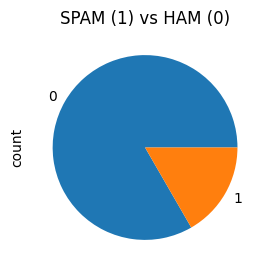

In [9]:
plt.figure(figsize=(3,3))
spam_ham = pd.value_counts(df['label'],sort = True)
spam_ham.plot(kind = 'pie')
plt.title('SPAM (1) vs HAM (0)')
plt.show()

In [10]:
X=df.email
Y=df.label

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [13]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [14]:
y_pred= model.predict(X_test)

In [15]:
print(model.score(X_test,y_test))

0.93


[[499   1]
 [ 41  59]]


<Axes: title={'center': 'Confusion Matrix Visualization'}>

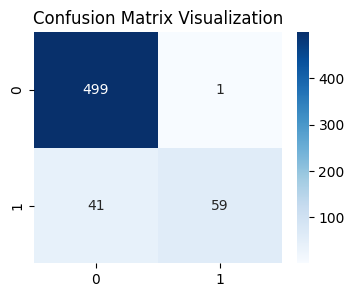

In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix,annot=True,fmt='',cmap='Blues')

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc_logreg=round(accuracy_score(y_pred,y_test)*100,2)
print(acc_logreg)

99.17


c:\Users\meetu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[500   0]
 [  5  95]]


<Axes: title={'center': 'Confusion Matrix Visualization'}>

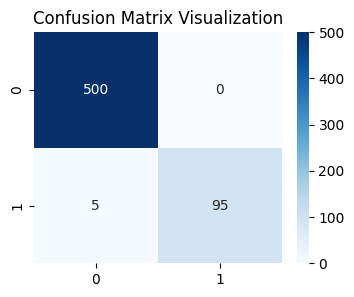

In [19]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix,annot=True,fmt='',cmap='Blues')